Printing 10 images with tumor brain


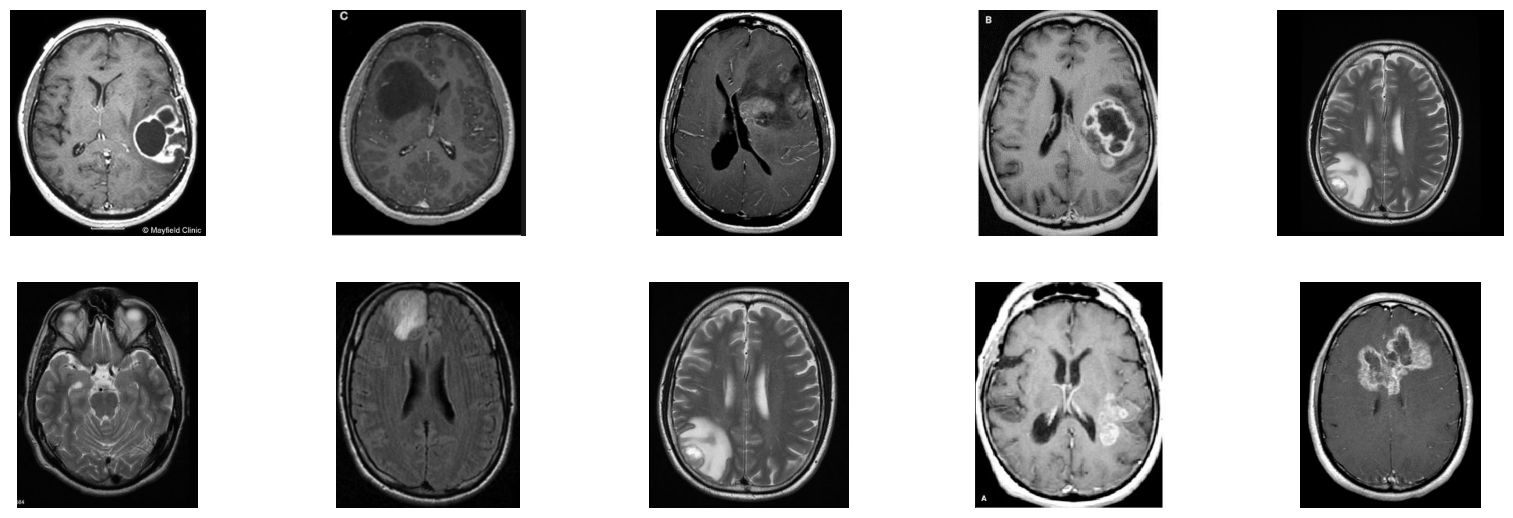

In [3]:
import glob
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
directory_path = './brain_tumor_dataset/'
directory_tumorbrain = directory_path +'yes'
directory_notumorbrain = directory_path +'no'

tumorbrain_images = []
notumorbrain_images = []
for image_path in glob.glob(os.path.join(directory_tumorbrain, "*")):
    image = mpimg.imread(image_path)
    tumorbrain_images.append(image)

samples = tumorbrain_images[:10]

print("Printing 10 images with tumor brain")
plt.figure(figsize=(20,10))
columns = 5
for i, image in enumerate(samples):
    plt.subplot(len(samples)// columns + 1, columns, i+1)
    plt.axis('off')
    plt.imshow(image)



Printing 10 images with no tumor brain


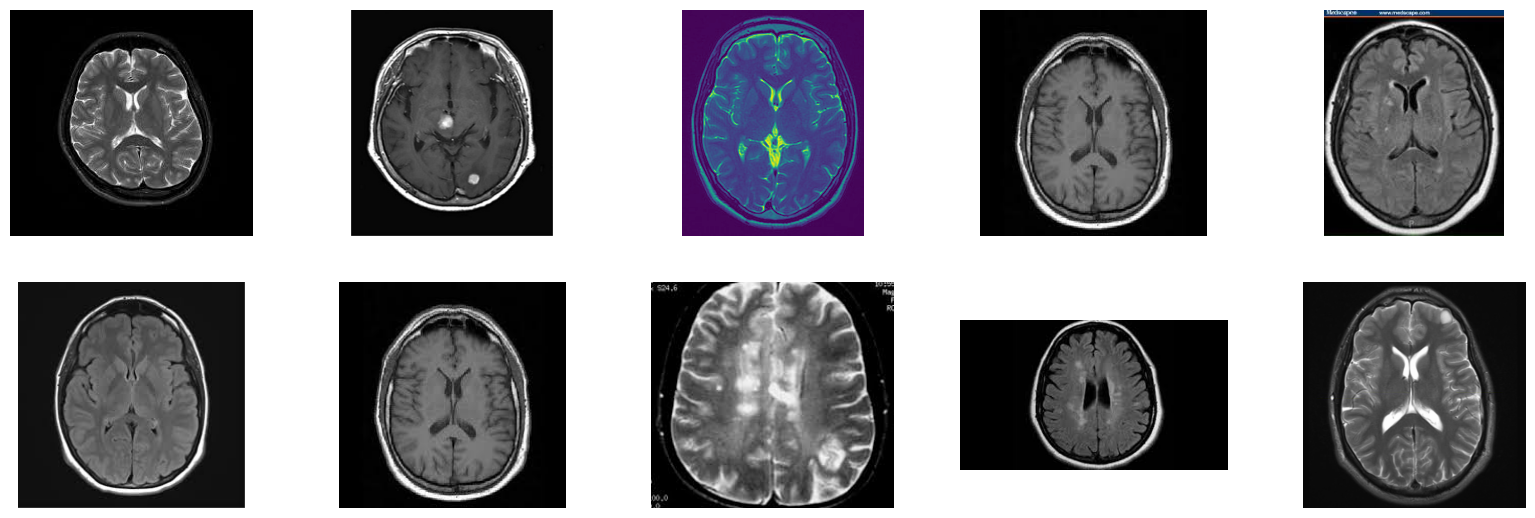

In [4]:
for image_path in glob.glob(os.path.join(directory_notumorbrain, "*")):
    image = mpimg.imread(image_path)
    notumorbrain_images.append(image)

print("Printing 10 images with no tumor brain")
plt.figure(figsize=(20,10))
columns = 5
samples = notumorbrain_images[:10]
for i, image in enumerate(samples):
    plt.subplot(len(samples)//columns +1, columns, i+1)
    plt.axis('off')
    plt.imshow(image)

In [5]:
#ordering the images by size
sorted_tumorbrain_images = sorted(tumorbrain_images, key=lambda x: x.shape[0])
sorted_notumorbrain_images = sorted(notumorbrain_images, key=lambda x: x.shape[0])


print("Shape of the 5 first images with tumor brain")
for i in range(10):
    print(sorted_tumorbrain_images[i].shape)

print("Shape of the 5 first images with no tumor brain")
for i in range(10):
    print(sorted_notumorbrain_images[i].shape)


Shape of the 5 first images with tumor brain
(173, 189, 3)
(210, 200, 3)
(212, 209, 3)
(218, 180, 3)
(219, 230, 3)
(223, 226, 3)
(225, 225, 3)
(225, 225, 3)
(233, 215, 3)
(234, 216, 3)
Shape of the 5 first images with no tumor brain
(168, 300, 3)
(168, 300, 3)
(168, 300, 3)
(183, 275, 3)
(192, 192, 3)
(194, 259, 3)
(197, 177, 3)
(198, 150, 3)
(200, 200, 3)
(200, 300, 3)


In [ ]:
#finding the images with only 2 dimensions
print("Images with only 2 dimensions on the tumor brain dataset:")
for i in range(len(sorted_tumorbrain_images)):
    if len(sorted_tumorbrain_images[i].shape) == 2:
        print("Index",i, sorted_tumorbrain_images[i].shape)

print("Images with only 2 dimensions on the no tumor brain dataset:")
for i in range(len(sorted_notumorbrain_images)):
    if len(sorted_notumorbrain_images[i].shape) == 2:
        print("Index",i, sorted_notumorbrain_images[i].shape)

Images with only 2 dimensions on the tumor brain dataset:
Index 30 (278, 236)
Index 36 (294, 250)
Index 37 (294, 250)
Index 41 (300, 240)
Index 43 (300, 289)
Index 44 (300, 289)
Index 58 (325, 300)
Index 59 (325, 300)
Index 60 (325, 300)
Index 62 (325, 300)
Index 66 (336, 300)
Index 104 (360, 319)
Index 105 (360, 319)
Index 123 (500, 377)
Index 145 (938, 911)
Index 150 (1024, 1024)
Index 154 (1427, 1275)
Images with only 2 dimensions on the no tumor brain dataset:
Index 23 (225, 225)
Index 57 (275, 220)
Index 58 (275, 220)
Index 61 (301, 275)
Index 70 (442, 409)
Index 71 (442, 442)
Index 74 (442, 442)
Index 76 (442, 442)
Index 89 (630, 630)
Index 90 (630, 630)
Index 91 (630, 630)
Index 95 (750, 750)
Index 96 (1024, 1024)


In [6]:
#adding the 3rd dimension to the images with only 2 dimensions
images2d_to_3d = []
for i in range(len(sorted_tumorbrain_images)):
    if len(sorted_tumorbrain_images[i].shape) == 2:
        sorted_tumorbrain_images[i] = np.expand_dims(sorted_tumorbrain_images[i], axis=-1)
        images2d_to_3d.append(sorted_tumorbrain_images[i])

for i in range(len(sorted_notumorbrain_images)):
    if len(sorted_notumorbrain_images[i].shape) == 2:
        sorted_notumorbrain_images[i] = np.expand_dims(sorted_notumorbrain_images[i], axis=-1)
        images2d_to_3d.append(sorted_notumorbrain_images[i])

Printing 10 images with tumor brain


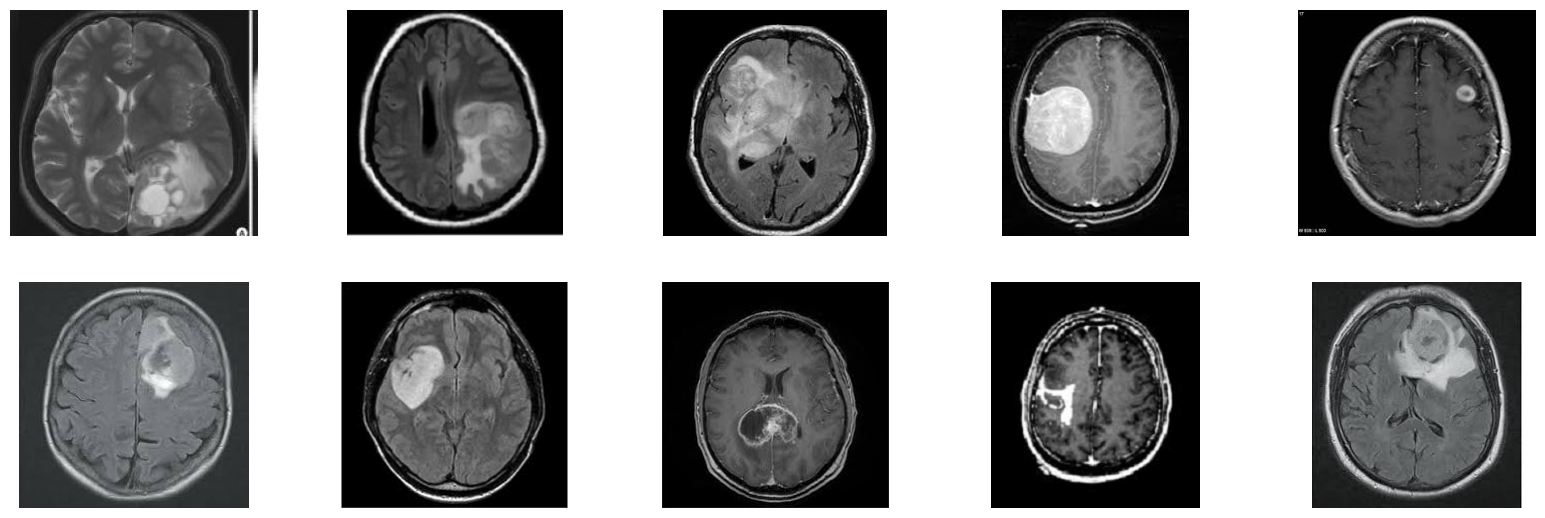

In [7]:
#printing 10 images with tumor brain
print("Printing 10 images with tumor brain")
def plot_samples_images(images):
    plt.figure(figsize=(20,10))
    columns = 5
    samples = images[:10]
    for i, image in enumerate(samples):
        plt.subplot(len(samples)// columns + 1, columns, i+1)
        plt.axis('off')
        plt.imshow(image)

plot_samples_images(sorted_tumorbrain_images)

In [8]:

#finding the images with incorrect dimensions
print("Converting the tumor brain images to grayscale")
gray_tumorbrain_images = []
for i in range(len(sorted_tumorbrain_images)):
    if sorted_tumorbrain_images[i].shape[2] > 1:
        gray_tumorbrain_images.append(cv2.cvtColor(sorted_tumorbrain_images[i], cv2.COLOR_BGR2GRAY))
    else:
        gray_tumorbrain_images.append(sorted_tumorbrain_images[i])

print("Converting the no tumor brain images to grayscale")
gray_notumorbrain_images = []
for i in range(len(sorted_notumorbrain_images)):
    if sorted_notumorbrain_images[i].shape[2] > 1:
        gray_notumorbrain_images.append(cv2.cvtColor(sorted_notumorbrain_images[i], cv2.COLOR_BGR2GRAY))
    else:
        gray_notumorbrain_images.append(sorted_notumorbrain_images[i])



Converting the tumor brain images to grayscale
Converting the no tumor brain images to grayscale


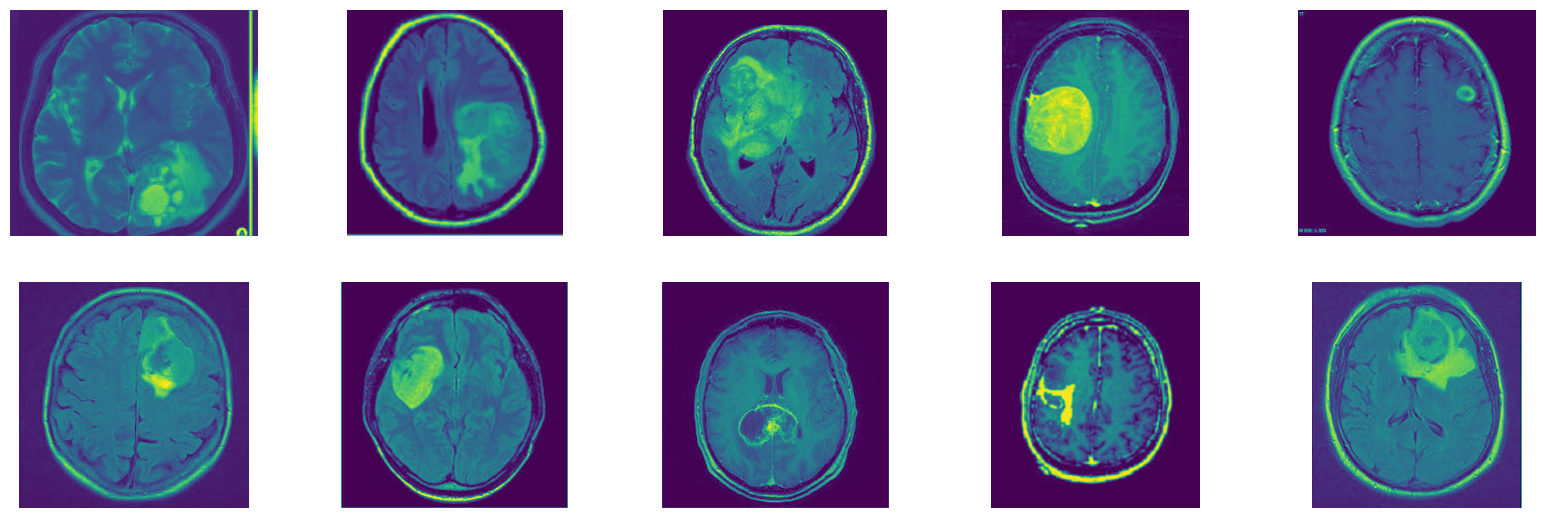

In [9]:
plot_samples_images(gray_tumorbrain_images)

In [10]:
#resizing the images
import cv2
resized_tumorbrain_images = []
resized_notumorbrain_images = []
for image in gray_tumorbrain_images:
    resized_tumorbrain_images.append(cv2.resize(image, (128, 128)))
for image in gray_notumorbrain_images:
    resized_notumorbrain_images.append(cv2.resize(image, (128, 128)))

target_tumorbrain_images = [1 for i in range(len(resized_tumorbrain_images))]
target_notumorbrain_images = [0 for i in range(len(resized_notumorbrain_images))]
target_brain_images = target_tumorbrain_images + target_notumorbrain_images
resized_brain_images = resized_tumorbrain_images + resized_notumorbrain_images

resized_tumorbrain_images = np.array(resized_tumorbrain_images)
resized_notumorbrain_images = np.array(resized_notumorbrain_images)
resized_brain_images = np.array(resized_brain_images)
target_brain_images = np.array(target_brain_images)

print("Shape of the resized tumor brain images:", resized_tumorbrain_images.shape)
print("Shape of the resized no tumor brain images:", resized_notumorbrain_images.shape)
print("Shape of resized brain images:", resized_brain_images.shape)
print("Shape of the target brain images:", target_brain_images.shape)


Shape of the resized tumor brain images: (155, 128, 128)
Shape of the resized no tumor brain images: (98, 128, 128)
Shape of resized brain images: (253, 128, 128)
Shape of the target brain images: (253,)


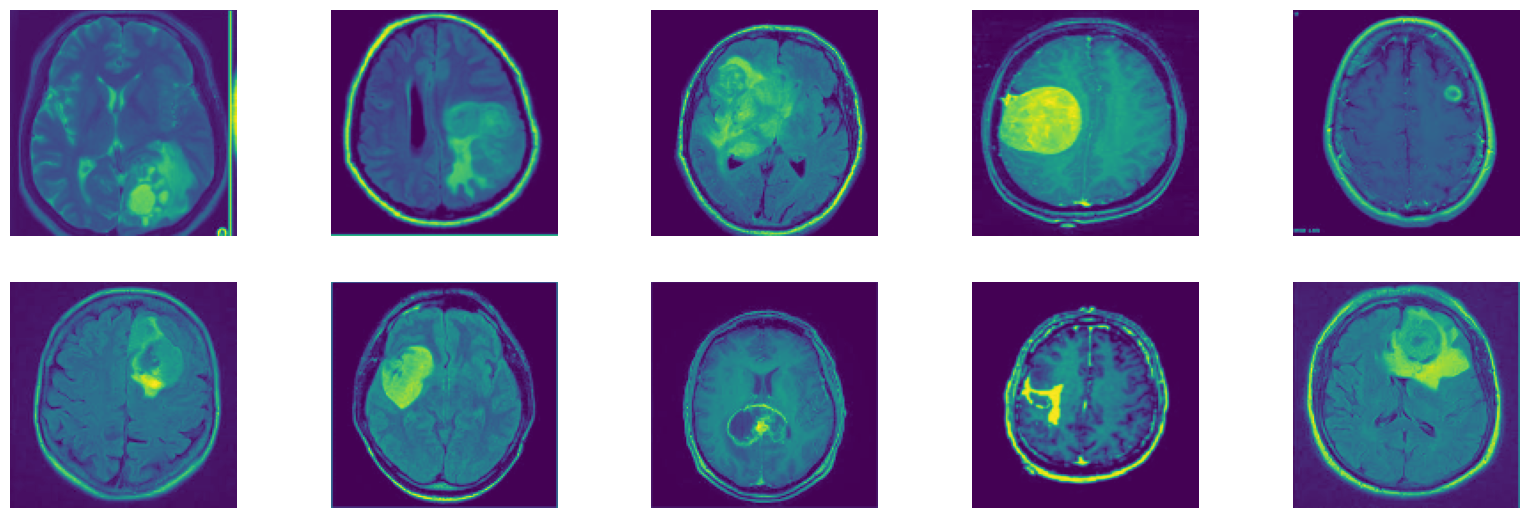

In [ ]:
plot_samples_images(resized_brain_images)

In [16]:
from sklearn.model_selection import train_test_split
#normalizing the data
X = resized_brain_images / 255.0
y = target_brain_images

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print("Shape of the training data:", X_train.shape)
print("Shape of the testing data:", X_test.shape)
print("Shape of the training target:", y_train.shape)
print("Shape of the testing target:", y_test.shape)


Shape of the training data: (202, 128, 128)
Shape of the testing data: (51, 128, 128)
Shape of the training target: (202,)
Shape of the testing target: (51,)


In [17]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

height, width = resized_brain_images[0].shape
channels = 1

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(height, width, channels)),
    MaxPooling2D((2, 2)),
    Dropout(0.2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')  # Assuming binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#adding early stopping monitoring the accuracy
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, mode='max', restore_best_weights=True)


In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 63, 63, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 30, 30, 64)        0

Epoch 1/50
6/6 [==============================] - 11s 1s/step - loss: 0.8748 - accuracy: 0.5776 - val_loss: 0.6137 - val_accuracy: 0.7805
Epoch 2/50
6/6 [==============================] - 6s 955ms/step - loss: 0.5813 - accuracy: 0.7516 - val_loss: 0.4778 - val_accuracy: 0.7805
Epoch 3/50
6/6 [==============================] - 7s 1s/step - loss: 0.5232 - accuracy: 0.7453 - val_loss: 0.4743 - val_accuracy: 0.7805
Epoch 4/50
6/6 [==============================] - 5s 888ms/step - loss: 0.5735 - accuracy: 0.7267 - val_loss: 0.4640 - val_accuracy: 0.7805
Epoch 5/50
6/6 [==============================] - 7s 1s/step - loss: 0.5138 - accuracy: 0.7453 - val_loss: 0.4982 - val_accuracy: 0.8049
Epoch 6/50
6/6 [==============================] - 6s 949ms/step - loss: 0.4956 - accuracy: 0.7516 - val_loss: 0.4947 - val_accuracy: 0.8049
Epoch 7/50
6/6 [==============================] - 7s 1s/step - loss: 0.4992 - accuracy: 0.7329 - val_loss: 0.5862 - val_accuracy: 0.7073
Epoch 8/50
6/6 [===============

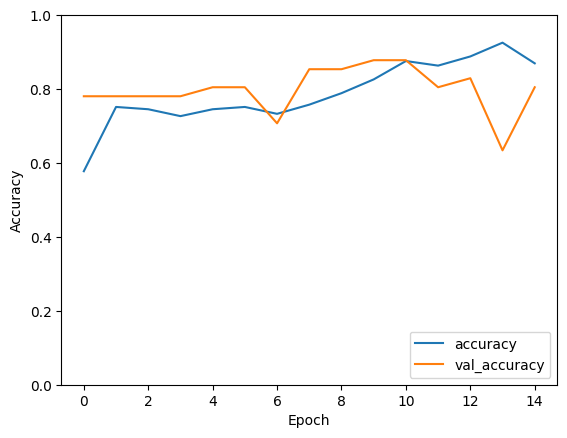

In [18]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

In [19]:
#evaluating the model
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

print(test_acc)

#predicting the test set
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)


2/2 - 1s - loss: 0.4333 - accuracy: 0.8627 - 640ms/epoch - 320ms/step
0.8627451062202454
2/2 [==============================] - 1s 296ms/step
[[16  4]
 [ 3 28]]


<Axes: >

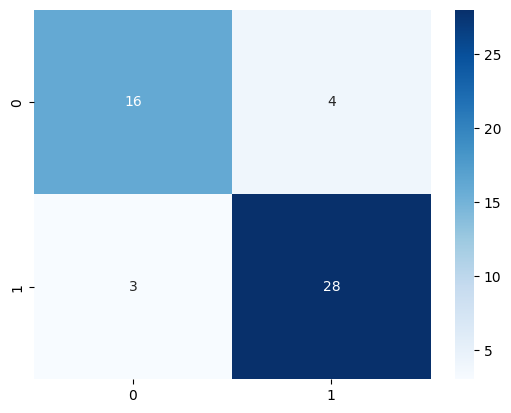

In [20]:
#plotting the confusion matrix
import seaborn as sns
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')


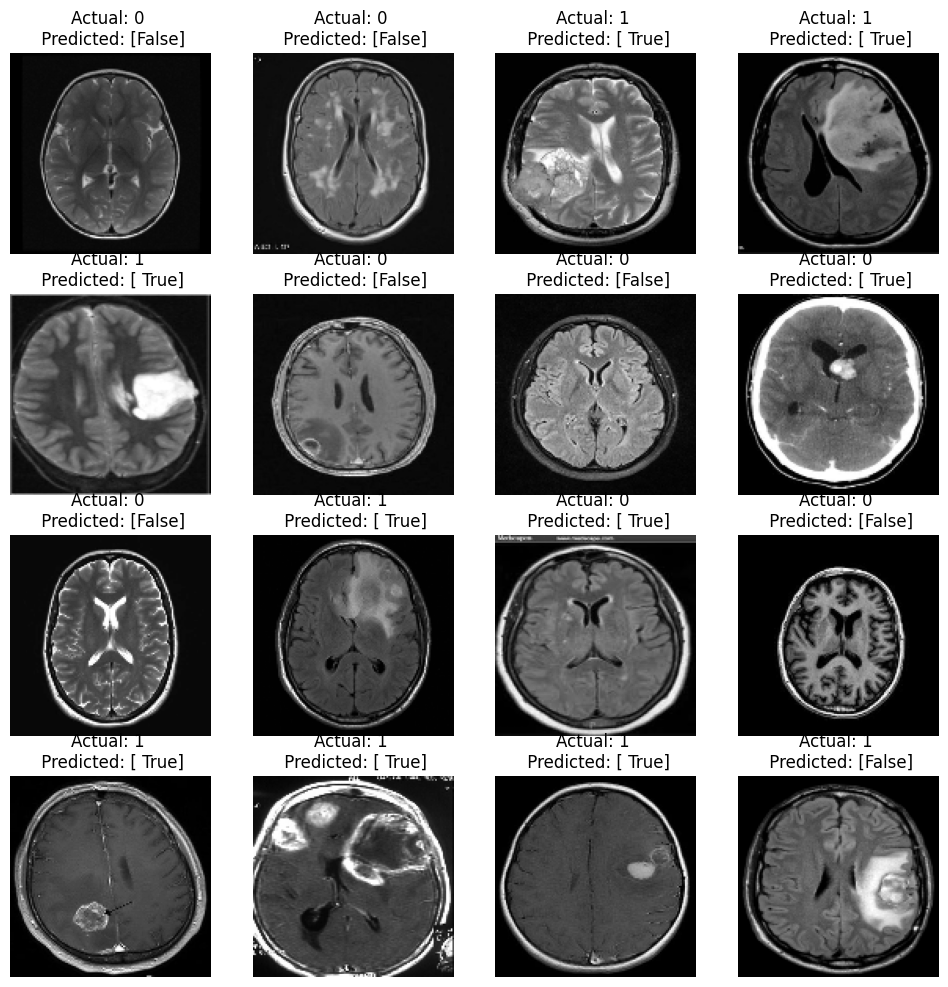

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [21]:
#plotting the images and their predictions
fig, axes = plt.subplots(4, 4, figsize=(12, 12))
for i in range(4):
    for j in range(4):
        index = np.random.randint(0, len(X_test))
        axes[i, j].imshow(X_test[index].reshape(height, width), cmap='gray')
        axes[i, j].set_title('Actual: {} \n Predicted: {}'.format(y_test[index], y_pred[index]))
        axes[i, j].axis('off')
plt.show()

#saving the model
model.save('brain_tumor_model.h5')



# Exercise 2

### Building the generator model

In [ ]:
#Building the generator model of the GAN
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Reshape, BatchNormalization, LeakyReLU, Conv2DTranspose

generator_model = Sequential()
generator_model.add(Dense(16*16*128, use_bias=False, input_shape=(100,)))
generator_model.add(Reshape((16, 16, 128)))
generator_model.add(BatchNormalization())
generator_model.add(LeakyReLU())
generator_model.add(Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False))
generator_model.add(BatchNormalization())
generator_model.add(LeakyReLU())
generator_model.add(Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
generator_model.add(BatchNormalization())
generator_model.add(LeakyReLU())
generator_model.add(Conv2DTranspose(32, (5, 5), strides=(2, 2), padding='same', use_bias=False))
generator_model.add(BatchNormalization())
generator_model.add(LeakyReLU())
generator_model.add(Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))

generator_model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 32768)             3276800   
                                                                 
 reshape_2 (Reshape)         (None, 16, 16, 128)       0         
                                                                 
 batch_normalization_10 (Ba  (None, 16, 16, 128)       512       
 tchNormalization)                                               
                                                                 
 leaky_re_lu_14 (LeakyReLU)  (None, 16, 16, 128)       0         
                                                                 
 conv2d_transpose_10 (Conv2  (None, 16, 16, 128)       409600    
 DTranspose)                                                     
                                                                 
 batch_normalization_11 (Ba  (None, 16, 16, 128)      

### Print a sampling using the untranied generator

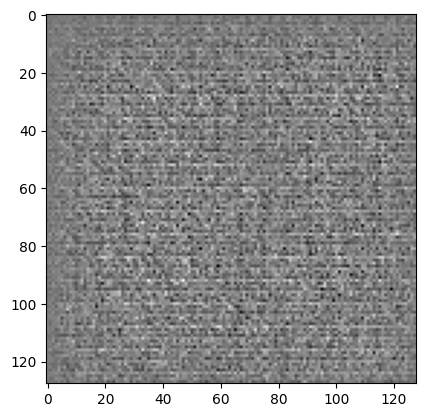

In [ ]:
#sample untrained generator
sample_vector = tf.random.normal([1, 100])
sample_image = generator_model(sample_vector, training=False)
plt.imshow(sample_image[0, :, :, 0], cmap='gray')

### Building the discriminator

In [ ]:
#Building the discriminator model of the GAN
from tensorflow.keras.layers import Conv2D, Flatten, Dropout

discriminator_model = Sequential()
discriminator_model.add(Conv2D(64, (5, 5), strides=(2, 2), padding='same', input_shape=[128, 128, 1]))
discriminator_model.add(LeakyReLU())
discriminator_model.add(Dropout(0.3))
discriminator_model.add(Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
discriminator_model.add(LeakyReLU())
discriminator_model.add(Dropout(0.3))
discriminator_model.add(Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same'))
discriminator_model.add(BatchNormalization())
discriminator_model.add(LeakyReLU())
discriminator_model.add(Flatten())
discriminator_model.add(Dense(1))

discriminator_model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_23 (Conv2D)          (None, 64, 64, 64)        1664      
                                                                 
 leaky_re_lu_45 (LeakyReLU)  (None, 64, 64, 64)        0         
                                                                 
 dropout_20 (Dropout)        (None, 64, 64, 64)        0         
                                                                 
 conv2d_24 (Conv2D)          (None, 32, 32, 128)       204928    
                                                                 
 leaky_re_lu_46 (LeakyReLU)  (None, 32, 32, 128)       0         
                                                                 
 dropout_21 (Dropout)        (None, 32, 32, 128)       0         
                                                                 
 conv2d_transpose_31 (Conv2  (None, 64, 64, 64)      

In [ ]:
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)
generator_optimizer = tf.keras.optimizers.legacy.Adam()
discriminator_optimizer = tf.keras.optimizers.legacy.Adam()

def training_step(images):
    noise = tf.random.normal([tf.shape(images)[0], 100])
    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_images = generator_model(noise, training=True)
        real_output = discriminator_model(images, training=True)
        fake_output = discriminator_model(generated_images, training=True)
        gen_loss = cross_entropy(tf.ones_like(fake_output), fake_output)
        real_loss = cross_entropy(tf.ones_like(real_output), real_output)
        fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
        disc_loss = real_loss + fake_loss
    gradients_of_generator = gen_tape.gradient(gen_loss, generator_model.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator_model.trainable_variables)
    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator_model.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator_model.trainable_variables))
    return gen_loss, disc_loss

In [ ]:
#normalizing the pixel values to be between -1 to 1
X_train_normalized = (X_train - 127.5) / 127.5
X_test_normalized = (X_test - 127.5) / 127.5
train_dataset_tumor = tf.data.Dataset.from_tensor_slices(X_train_normalized[y_train == 1])
train_dataset_tumor = train_dataset_tumor.shuffle(buffer_size=np.shape(X_train_normalized)[0]).batch(256)
train_dataset_normal = tf.data.Dataset.from_tensor_slices(X_train_normalized[y_train == 0])
train_dataset_normal = train_dataset_normal.shuffle(buffer_size=np.shape(X_train_normalized)[0]).batch(256)

In [ ]:
X_train_normalized[y_train==1].shape

(124, 128, 128)

In [ ]:
X_train_normalized[y_train==0].shape

(78, 128, 128)

### Training the model

In [ ]:
import time

epochs = 10000

gen_loss_history = []
disc_loss_history = []

for epoch in range(epochs):
    start_time = time.time()
    for images in train_dataset_normal:
        gen_loss, disc_loss = training_step(images)
        gen_loss_history.append(gen_loss)
        disc_loss_history.append(disc_loss)
    print('Time for epoch {} is {} sec'.format(epoch + 1, time.time()-start_time))

Time for epoch 1 is 3.25626802444458 sec
Time for epoch 2 is 2.6066622734069824 sec
Time for epoch 3 is 2.601926803588867 sec
Time for epoch 4 is 2.509679079055786 sec
Time for epoch 5 is 2.5264291763305664 sec
Time for epoch 6 is 2.5704357624053955 sec
Time for epoch 7 is 2.5035629272460938 sec
Time for epoch 8 is 2.5341529846191406 sec
Time for epoch 9 is 2.5541958808898926 sec
Time for epoch 10 is 2.47306489944458 sec
Time for epoch 11 is 2.550590991973877 sec
Time for epoch 12 is 2.512962818145752 sec
Time for epoch 13 is 2.5073649883270264 sec
Time for epoch 14 is 2.541822910308838 sec
Time for epoch 15 is 2.503187894821167 sec
Time for epoch 16 is 2.4853968620300293 sec
Time for epoch 17 is 2.510637044906616 sec
Time for epoch 18 is 2.636991024017334 sec
Time for epoch 19 is 2.5295560359954834 sec
Time for epoch 20 is 2.5097270011901855 sec
Time for epoch 21 is 2.4785919189453125 sec
Time for epoch 22 is 2.487920045852661 sec
Time for epoch 23 is 2.531726837158203 sec
Time for ep

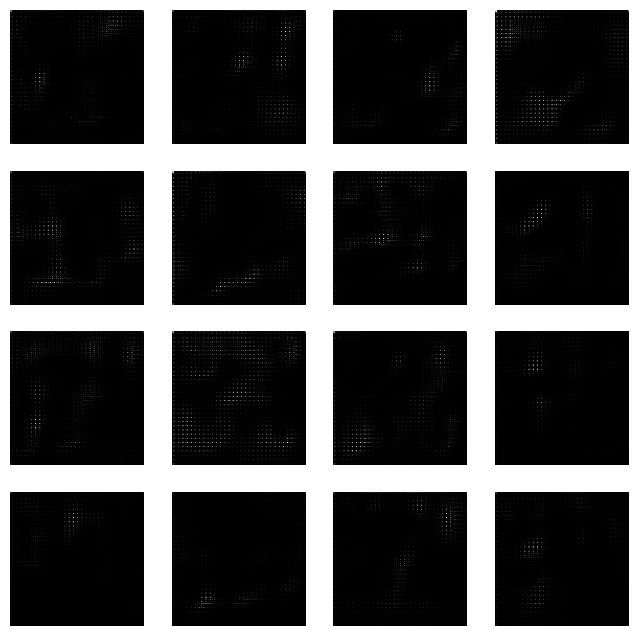

In [ ]:
import matplotlib.pyplot as plt

# Generating 16 sample vectors
sample_vectors = tf.random.normal(shape=(16, 100))

# Generating images from the generator
generated_images = generator_model(sample_vectors, training=False)

# Normalizing the pixels in the generated images
generated_images = (generated_images * 127.5) + 127.5

# Plotting the generated images
plt.figure(figsize=(8, 8))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(generated_images[i, :, :, 0], cmap='gray')
    plt.axis('off')
plt.show()

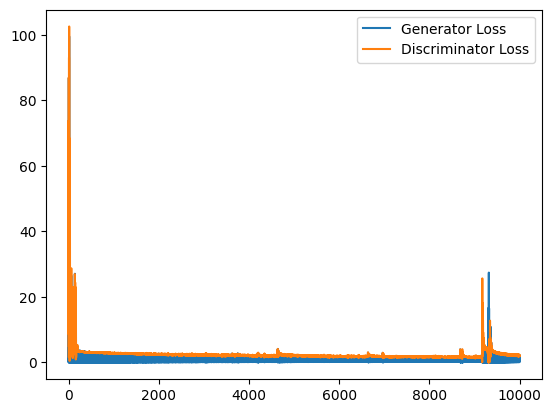

In [ ]:
#plotting the loss history of the generator and discriminator
plt.plot(gen_loss_history, label='Generator Loss')
plt.plot(disc_loss_history, label='Discriminator Loss')
plt.legend()
plt.show()

In [ ]:
discriminator_model_tumorbrain = Sequential()
discriminator_model_tumorbrain.add(Conv2D(64, (5, 5), strides=(2, 2), padding='same', input_shape=[128, 128, 1]))
discriminator_model_tumorbrain.add(LeakyReLU())
discriminator_model_tumorbrain.add(Dropout(0.3))
discriminator_model_tumorbrain.add(Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
discriminator_model_tumorbrain.add(LeakyReLU())
discriminator_model_tumorbrain.add(Dropout(0.3))
discriminator_model_tumorbrain.add(Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same'))
discriminator_model_tumorbrain.add(BatchNormalization())
discriminator_model_tumorbrain.add(LeakyReLU())
discriminator_model_tumorbrain.add(Flatten())
discriminator_model_tumorbrain.add(Dense(1))

generator_model_tumorbrain = Sequential()
generator_model_tumorbrain.add(Dense(16*16*128, use_bias=False, input_shape=(100,)))
generator_model_tumorbrain.add(Reshape((16, 16, 128)))
generator_model_tumorbrain.add(BatchNormalization())
generator_model_tumorbrain.add(LeakyReLU())
generator_model_tumorbrain.add(Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False))
generator_model_tumorbrain.add(BatchNormalization())
generator_model_tumorbrain.add(LeakyReLU())
generator_model_tumorbrain.add(Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
generator_model_tumorbrain.add(BatchNormalization())
generator_model_tumorbrain.add(LeakyReLU())
generator_model_tumorbrain.add(Conv2DTranspose(32, (5, 5), strides=(2, 2), padding='same', use_bias=False))
generator_model_tumorbrain.add(BatchNormalization())
generator_model_tumorbrain.add(LeakyReLU())
generator_model_tumorbrain.add(Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))

train_dataset_tumor = tf.data.Dataset.from_tensor_slices(X_train_normalized[y_train == 1])
train_dataset_tumor = train_dataset_tumor.shuffle(buffer_size=np.shape(X_train_normalized)[0]).batch(256)
train_dataset_normal = tf.data.Dataset.from_tensor_slices(X_train_normalized[y_train == 0])
train_dataset_normal = train_dataset_normal.shuffle(buffer_size=np.shape(X_train_normalized)[0]).batch(256)


In [ ]:
cross_entropy_tumor = tf.keras.losses.BinaryCrossentropy(from_logits=True)
generator_optimizer_tumor = tf.keras.optimizers.legacy.Adam()
discriminator_optimizer_tumor = tf.keras.optimizers.legacy.Adam()

def training_step_tumor(images):
    noise = tf.random.normal([tf.shape(images)[0], 100])
    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_images = generator_model_tumorbrain(noise, training=True)
        real_output = discriminator_model_tumorbrain(images, training=True)
        fake_output = discriminator_model_tumorbrain(generated_images, training=True)
        gen_loss = cross_entropy_tumor(tf.ones_like(fake_output), fake_output)
        real_loss = cross_entropy_tumor(tf.ones_like(real_output), real_output)
        fake_loss = cross_entropy_tumor(tf.zeros_like(fake_output), fake_output)
        disc_loss = real_loss + fake_loss
    gradients_of_generator = gen_tape.gradient(gen_loss, generator_model_tumorbrain.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator_model_tumorbrain.trainable_variables)
    generator_optimizer_tumor.apply_gradients(zip(gradients_of_generator, generator_model_tumorbrain.trainable_variables))
    discriminator_optimizer_tumor.apply_gradients(zip(gradients_of_discriminator, discriminator_model_tumorbrain.trainable_variables))
    return gen_loss, disc_loss

In [ ]:
epochs = 300

gen_loss_history = []
disc_loss_history = []

for epoch in range(epochs):
    start_time = time.time()
    for images in train_dataset_tumor:
        gen_loss, disc_loss = training_step_tumor(images)
        gen_loss_history.append(gen_loss)
        disc_loss_history.append(disc_loss)
    print('Time for epoch {} is {} sec'.format(epoch + 1, time.time()-start_time))

Time for epoch 1 is 5.449508905410767 sec
Time for epoch 2 is 4.171893835067749 sec
Time for epoch 3 is 4.085120916366577 sec
Time for epoch 4 is 5.121147155761719 sec
Time for epoch 5 is 4.22465705871582 sec
Time for epoch 6 is 4.13630485534668 sec
Time for epoch 7 is 4.288383960723877 sec
Time for epoch 8 is 4.143966913223267 sec
Time for epoch 9 is 4.015272855758667 sec
Time for epoch 10 is 4.238615036010742 sec
Time for epoch 11 is 3.9857070446014404 sec
Time for epoch 12 is 3.904200792312622 sec
Time for epoch 13 is 3.8227458000183105 sec
Time for epoch 14 is 3.8394339084625244 sec
Time for epoch 15 is 3.8867270946502686 sec
Time for epoch 16 is 3.952949047088623 sec
Time for epoch 17 is 4.006408929824829 sec
Time for epoch 18 is 3.8009982109069824 sec
Time for epoch 19 is 3.749871253967285 sec
Time for epoch 20 is 3.9639999866485596 sec
Time for epoch 21 is 3.979429244995117 sec
Time for epoch 22 is 3.842069149017334 sec
Time for epoch 23 is 3.891317844390869 sec
Time for epoch 2

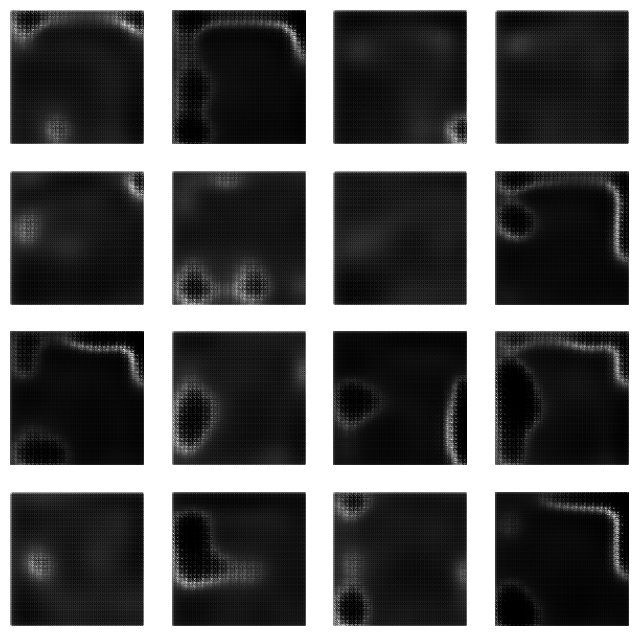

In [ ]:
# Generating 16 sample vectors
sample_vectors = tf.random.normal(shape=(16, 100))

# Generating images from the generator
generated_images = generator_model_tumorbrain(sample_vectors, training=False)

# Normalizing the pixels in the generated images
generated_images = (generated_images * 127.5) + 127.5

# Plotting the generated images
plt.figure(figsize=(8, 8))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(generated_images[i, :, :, 0], cmap='gray')
    plt.axis('off')
plt.show()

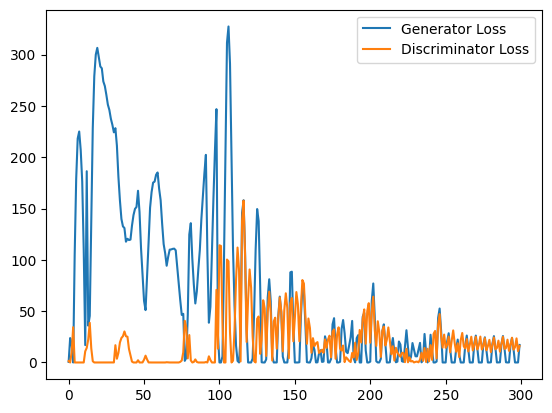

In [ ]:
#plotting the loss history of the generator and discriminator
plt.plot(gen_loss_history, label='Generator Loss')
plt.plot(disc_loss_history, label='Discriminator Loss')
plt.legend()
plt.show()

In [ ]:
discriminator_model_brain = Sequential()
discriminator_model_brain.add(Conv2D(64, (5, 5), strides=(2, 2), padding='same', input_shape=[128, 128, 1]))
discriminator_model_brain.add(LeakyReLU())
discriminator_model_brain.add(Dropout(0.3))
discriminator_model_brain.add(Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
discriminator_model_brain.add(LeakyReLU())
discriminator_model_brain.add(Dropout(0.3))
discriminator_model_brain.add(Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same'))
discriminator_model_brain.add(BatchNormalization())
discriminator_model_brain.add(LeakyReLU())
discriminator_model_brain.add(Flatten())
discriminator_model_brain.add(Dense(1))

generator_model_brain = Sequential()
generator_model_brain.add(Dense(16*16*128, use_bias=False, input_shape=(100,)))
generator_model_brain.add(Reshape((16, 16, 128)))
generator_model_brain.add(BatchNormalization())
generator_model_brain.add(LeakyReLU())
generator_model_brain.add(Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False))
generator_model_brain.add(BatchNormalization())
generator_model_brain.add(LeakyReLU())
generator_model_brain.add(Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
generator_model_brain.add(BatchNormalization())
generator_model_brain.add(LeakyReLU())
generator_model_brain.add(Conv2DTranspose(32, (5, 5), strides=(2, 2), padding='same', use_bias=False))
generator_model_brain.add(BatchNormalization())
generator_model_brain.add(LeakyReLU())
generator_model_brain.add(Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))

train_dataset_brain = tf.data.Dataset.from_tensor_slices(X_train_normalized)
train_dataset_brain = train_dataset_brain.shuffle(buffer_size=np.shape(X_train_normalized)[0]).batch(256)

cross_entropy_brain = tf.keras.losses.BinaryCrossentropy(from_logits=True)
generator_optimizer_brain = tf.keras.optimizers.legacy.Adam()
discriminator_optimizer_brain = tf.keras.optimizers.legacy.Adam()

def training_step_brain(images):
    noise = tf.random.normal([tf.shape(images)[0], 100])
    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_images = generator_model_brain(noise, training=True)
        real_output = discriminator_model_brain(images, training=True)
        fake_output = discriminator_model_brain(generated_images, training=True)
        gen_loss = cross_entropy_tumor(tf.ones_like(fake_output), fake_output)
        real_loss = cross_entropy_tumor(tf.ones_like(real_output), real_output)
        fake_loss = cross_entropy_tumor(tf.zeros_like(fake_output), fake_output)
        disc_loss = real_loss + fake_loss
    gradients_of_generator = gen_tape.gradient(gen_loss, generator_model_brain.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator_model_brain.trainable_variables)
    generator_optimizer_brain.apply_gradients(zip(gradients_of_generator, generator_model_brain.trainable_variables))
    discriminator_optimizer_brain.apply_gradients(zip(gradients_of_discriminator, discriminator_model_brain.trainable_variables))
    return gen_loss, disc_loss


In [ ]:
epochs = 200

gen_loss_history = []
disc_loss_history = []

for epoch in range(epochs):
    start_time = time.time()
    for images in train_dataset_brain:
        gen_loss, disc_loss = training_step_brain(images)
        gen_loss_history.append(gen_loss)
        disc_loss_history.append(disc_loss)
    print('Time for epoch {} is {} sec'.format(epoch + 1, time.time()-start_time))

Time for epoch 1 is 8.72795820236206 sec
Time for epoch 2 is 8.055065155029297 sec
Time for epoch 3 is 6.852050065994263 sec
Time for epoch 4 is 8.267398834228516 sec
Time for epoch 5 is 8.559668064117432 sec
Time for epoch 6 is 7.535084247589111 sec
Time for epoch 7 is 6.663142919540405 sec
Time for epoch 8 is 7.690042734146118 sec
Time for epoch 9 is 7.054167032241821 sec
Time for epoch 10 is 7.713057994842529 sec
Time for epoch 11 is 7.677079200744629 sec
Time for epoch 12 is 7.475415229797363 sec
Time for epoch 13 is 7.973641872406006 sec
Time for epoch 14 is 7.326549053192139 sec
Time for epoch 15 is 8.307862043380737 sec
Time for epoch 16 is 7.185868978500366 sec
Time for epoch 17 is 7.795784950256348 sec
Time for epoch 18 is 7.3157312870025635 sec
Time for epoch 19 is 8.887800216674805 sec
Time for epoch 20 is 8.783639907836914 sec
Time for epoch 21 is 7.079149007797241 sec
Time for epoch 22 is 6.730864763259888 sec
Time for epoch 23 is 8.504287004470825 sec
Time for epoch 24 is

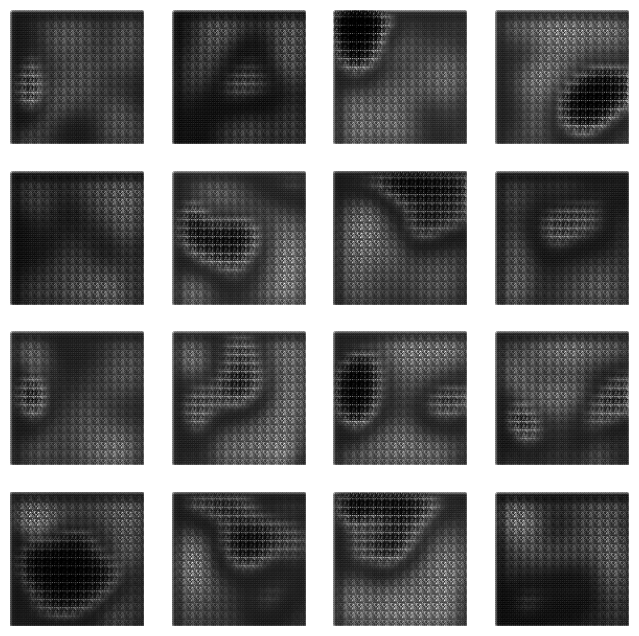

In [ ]:
# Generating 16 sample vectors
sample_vectors = tf.random.normal(shape=(16, 100))

# Generating images from the generator
generated_images = generator_model_brain(sample_vectors, training=False)

# Normalizing the pixels in the generated images
generated_images = (generated_images * 127.5) + 127.5

# Plotting the generated images
plt.figure(figsize=(8, 8))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(generated_images[i, :, :, 0], cmap='gray')
    plt.axis('off')
plt.show()